<a href="https://colab.research.google.com/github/shivsurya-s/Task_7/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/shivsurya-s/Task_7/main/Dataset/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop(["User ID"],axis=1,inplace=True)

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

**Splitting the dataset into the Training set and Test set**

In [6]:
X=df[["Gender","Age","EstimatedSalary"]]
y=df["Purchased"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

**Fitting SVM to the Training set**

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm

In [13]:
#rbf
svc_model = svm.SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

**Predicting the Test set results**

In [14]:
#rbf
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.7625
0.825


In [18]:
y_pred=svc_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

**Making the Confusion Matrix**

In [19]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,56,2,58
1,12,10,22
All,68,12,80


**Visualising the Training set results**

In [21]:
training_score = svc_model.score(X_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 76.25


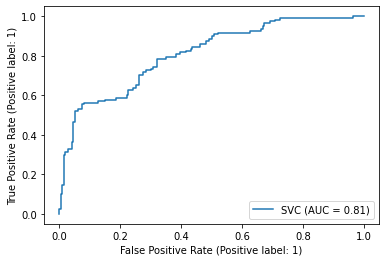

In [25]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(svc_model,X_train,y_train)

**Visualising the Test set results**

In [26]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 82.5


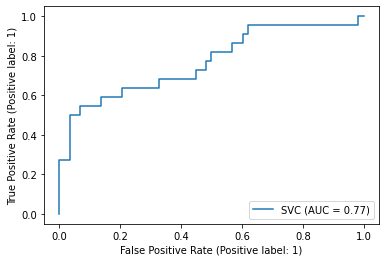

In [27]:
RocCurveDisplay.from_estimator(svc_model,X_test,y_test)